In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = pd.read_csv('../Data Preprocessing/Final_Out.csv')

X_train = X[X['Day'] < 29]
X_test = X[X['Day'] >= 29]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_test_scaled = scaler.transform(X_test.to_numpy())

X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_copy = X_train.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])
X_test_copy = X_test.drop(columns=['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall'])

Y_train_copy = X_train[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall']]
Y_test_copy = X_test[['Next Time to Fine Arts Annex', 'Next Time to Loyola House of Studies', 'Next Time to Grade School', 'Next Time to Gate 2.5', 'Next Time to Leong Hall', 'Next Time to Xavier Hall']]

pca_data = []
r2_data = []

# Compute PCA
for i in range(1, len(X_train_copy.columns) + 1):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_train_copy)

    pca_data.append((i, sum(pca.explained_variance_ratio_)))

    print(f'Count: {i}, Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

    np.savetxt(f'PCA Files/pca-train-{i}.txt', X_pca, fmt='%d')

    model = LinearRegression()
    model.fit(X_pca, Y_train_copy)

    X_test_pca = pca.fit_transform(X_test_copy)
    np.savetxt(f'PCA Files/pca-test-{i}.txt', X_test_pca, fmt='%d')
    y_pred = model.predict(X_test_pca)

    r2 = r2_score(Y_test_copy, y_pred)
    r2_data.append({
        'Component Count': i,
        'R^2': r2 
    })



Count: 1, Explained Variance Ratio: 0.21363019721755916
Count: 2, Explained Variance Ratio: 0.38711627235814333
Count: 3, Explained Variance Ratio: 0.5342407191056453
Count: 4, Explained Variance Ratio: 0.623368038822863
Count: 5, Explained Variance Ratio: 0.6949608759046105
Count: 6, Explained Variance Ratio: 0.7584397216189342
Count: 7, Explained Variance Ratio: 0.7987845622557522
Count: 8, Explained Variance Ratio: 0.8346293524035724
Count: 9, Explained Variance Ratio: 0.8665974473661723
Count: 10, Explained Variance Ratio: 0.8949423129059133
Count: 11, Explained Variance Ratio: 0.9123972379737587
Count: 12, Explained Variance Ratio: 0.9293969266002889
Count: 13, Explained Variance Ratio: 0.9442274702177652
Count: 14, Explained Variance Ratio: 0.9545898135374187
Count: 15, Explained Variance Ratio: 0.9635868147802038
Count: 16, Explained Variance Ratio: 0.9700176184980698
Count: 17, Explained Variance Ratio: 0.9752454679070516
Count: 18, Explained Variance Ratio: 0.9796553948736065


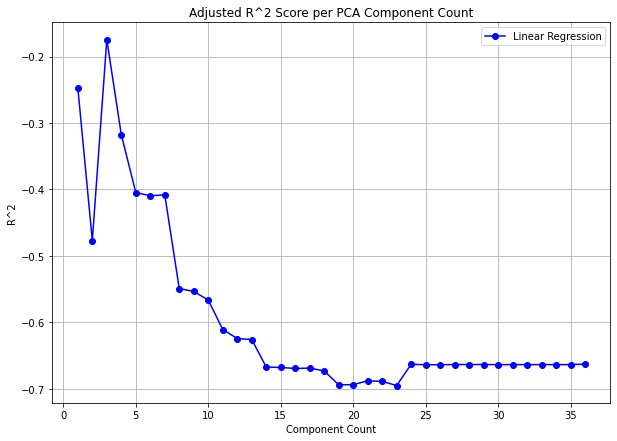

In [8]:
import matplotlib.pyplot as plt

x_values = [val['Component Count'] for val in r2_data]
data = [val['R^2'] for val in r2_data]

plt.figure(figsize=(10, 7))
plt.plot(x_values, data, marker='o', linestyle='-', color='b', label='Linear Regression')
plt.xlabel('Component Count')
plt.ylabel('R^2')
plt.title('Adjusted R^2 Score per PCA Component Count')
plt.legend()  # Optional: Show legend
plt.grid(True)  # Optional: Show grid
plt.show()

In [4]:
len(Y_test_copy)

172813

In [ ]:
# Retrive Numpy Data
def fetch_pca_file(component_num: int) -> np.array:
    return np.loadtxt(f'PCA Files/pca-{i}.txt', dtype=float)

In [ ]:
import matplotlib as plt

x_values = [x for x, y in pca_data]
data = [y for x, y in pca_data]

plt.figure(figsize=(10, 7))
plt.plot(x_values, data, marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Feature Count')
plt.ylabel('Ratio')
plt.title('PCA Sum v Feature Count')
plt.legend()  # Optional: Show legend
plt.grid(True)  # Optional: Show grid
plt.show()